In [0]:
% matplotlib notebook
% matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import argparse, collections
from google.colab import files

###  Upload detection.csv file here:

In [2]:
inference = files.upload()

Saving detection.csv to detection (1).csv


### Upload groundtruth.csv file here:



In [3]:
groundtruth = files.upload()

Saving groundtruth.csv to groundtruth (1).csv


## WARNING:


> #### Files must be named "detection.csv" and "groundtruth.csv"
(or changed their names just bellow)



In [0]:
# no consigo utilizar loadtxt
ground = np.genfromtxt('detection.csv',
                    delimiter=",",skip_header=1,
                    dtype = "unicode")
detection = np.genfromtxt('groundtruth.csv',
                    delimiter=",",skip_header=1,
                    dtype = "unicode")


# before dividing detection by ground we must exclude non-numerical terms
# this function looks for "-" in column 1 and gives back the indexes

not_errors = np.where(ground[:,1] != "-")[0]
num_errors = len(np.where(ground[:,1] == "-")[0])
num_values = len(ground)

relation = np.zeros(ground.shape)
for valor in not_errors:
    relation[valor, :] = (np.absolute(detection[valor, :].astype(np.float) - ground[valor, :].astype(np.float))).astype(int)

In [5]:
### Complexity ###

bins = np.array([0, 1, 2, 3, np.max(relation) + 1])
etiquetas = ('Errors', '0', '1', '2', '3', '=>4')
pos_etiquetas = np.arange(len(etiquetas))

Complexity_sort = collections.Counter(np.digitize(relation[:, 3], bins))
Complexity_sort[0] = num_errors
Complexity_sort[1] -= Complexity_sort[0]
# Bars unsupported for type(s) 'Counter' --> we convert to ndarray
Complexity_count = np.zeros(len(Complexity_sort))

for i in np.arange(len(Complexity_sort)):
    Complexity_count[i] = Complexity_sort[i]

# percentage calculation
Complexity_count = Complexity_count * 100 / num_values

# graphic representation
figure = plt.figure()
plt.bar(np.arange(len(Complexity_count)), Complexity_count, color=['k', 'r', 'r', 'r', 'r'])
plt.xticks(pos_etiquetas, etiquetas)
plt.yticks(np.arange(0, 120, 20))
plt.xlabel('Difference between detection and ground')
plt.ylabel('Percentage of total measures')
plt.title('Complexity')
plt.ylim([0, 100])
plt.savefig('Complexity.png')
plt.show()

<IPython.core.display.Javascript object>

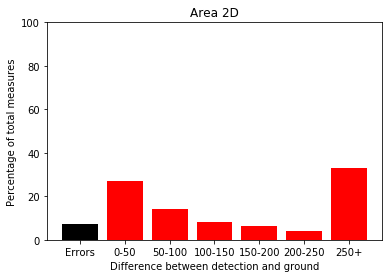

In [12]:
### AREA 2D ###

bins = np.array([0,50,100,150,200,250,np.max(relation)+1])
etiquetas = ('Errors','0-50','50-100','100-150','150-200','200-250','250+')
pos_etiquetas = np.arange(len(etiquetas))

Area2D_sort = collections.Counter(np.digitize(relation[:, 1], bins))
Area2D_sort[0] = num_errors
Area2D_sort[1] -= Area2D_sort[0]

# Bars unsupported for type(s) 'Counter' --> we convert to ndarray
Area2D_count = np.zeros(len(Area2D_sort))
for i in np.arange(len(Area2D_sort)):
    Area2D_count[i] = Area2D_sort[i]

# percentage calculation
Area2D_count = Area2D_count * 100 / num_values

# graphic representation
figure = plt.figure()
plt.xticks(pos_etiquetas, etiquetas)
plt.xlabel('Difference between detection and ground')
plt.ylabel('Percentage of total measures')
plt.title('Area 2D')
plt.bar(np.arange(len(Area2D_count)), Area2D_count, color=['k', 'r', 'r', 'r', 'r', 'r', 'r'])
plt.ylim([0, 100])
plt.savefig('Area 2D.png')
plt.show()

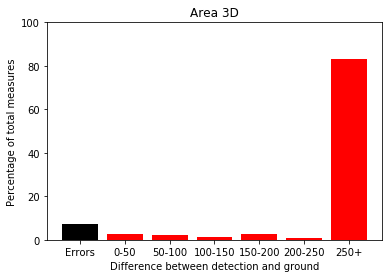

In [13]:
### AREA 3D ###

# borro datos de la grafica anterior

Area3D_sort = collections.Counter(np.digitize(relation[:, 2], bins))
Area3D_sort[0] = num_errors
Area3D_sort[1] -= Area3D_sort[0]

# Bars unsupported for type(s) 'Counter' --> we convert to ndarray
Area3D_count = np.zeros(len(Area3D_sort))
for i in np.arange(len(Area3D_sort)):
    Area3D_count[i] = Area3D_sort[i]

# percentage calculation
Area3D_count = Area3D_count * 100 / num_values

# graphic representation
plt.figure()
plt.xticks(pos_etiquetas, etiquetas)
plt.xlabel('Difference between detection and ground')
plt.ylabel('Percentage of total measures')
plt.title('Area 3D')
plt.bar(np.arange(len(Area3D_count)), Area3D_count, color=['k', 'r', 'r', 'r', 'r', 'r', 'r'])
plt.ylim([0, 100])
plt.savefig('Area 3D.png')
plt.show()